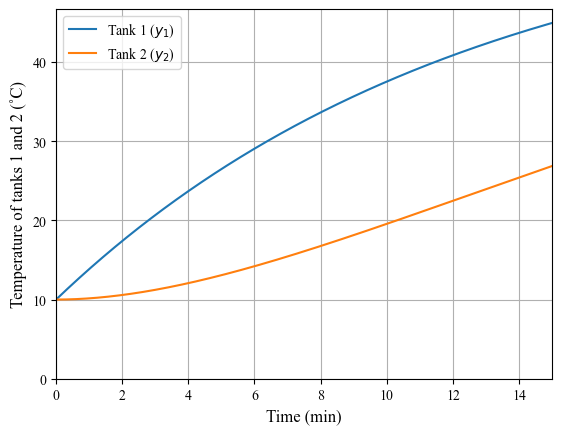

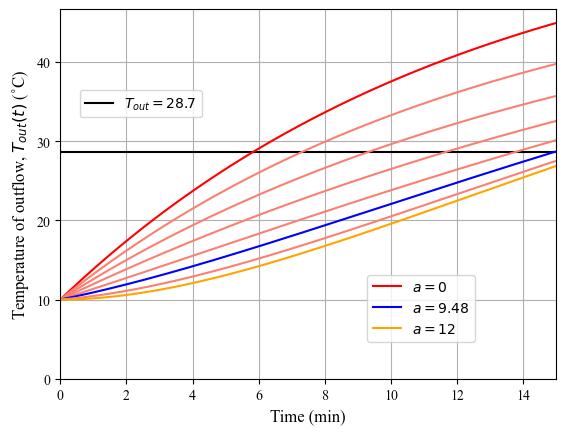

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font',family='Times New Roman')
title_font = {'fontname':'Times New Roman'}

### A2.4 

# (a)

def ode(t, y):
    dydt = [0.08*(60-y[0]), a/150*(y[0]-y[1])]
    return dydt 
            
a = 12              # When a=12, b=0 (no overflow)
            
tstart = 0
tstop = 15
y0 = [10, 10]
sol = solve_ivp(ode, [tstart, tstop], y0, max_step=0.01)
names = ['Tank 1 ($y_1$)', 'Tank 2 ($y_2$)']

plt.plot(sol.t, np.transpose(sol.y), label=[str(id) for id in names])
plt.xlabel('Time (min)', fontsize=12)
plt.ylabel('Temperature of tanks 1 and 2 (˚C)', fontsize=12)
plt.xlim(xmax=15)
plt.legend()
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.grid()
plt.show()

# (b)

T_out = lambda a: (12-a)/12 * sol.y[0] + a/12 * sol.y[1]
a_s = [0, 2, 4, 6, 8, 9.48, 11, 12]
ts = np.linspace(tstart, tstop, len(sol.y[0]))

for a in a_s:
    if a == min(a_s):
        ax = plt.axes()
        ax.axhline(28.7, xmax=15, color = 'black')
        asdf = plt.legend(["$T_{out}=28.7$"], bbox_to_anchor=(0.3,0.8))
        ax.grid()
    sol = solve_ivp(ode, [tstart, tstop], y0, max_step=0.01)
    T = T_out(a)
    if a==9.48:
        col = 'blue'
        plt.plot(ts, T, label=f"$a={a}$", color=col)
    elif a==min(a_s):
        col = 'red'
        plt.plot(ts, T, label=f"$a={a}$", color=col)
    elif a==max(a_s):
        col = 'orange'
        plt.plot(ts, T, label=f"$a={a}$", color=col)
    else:
        col = 'salmon' 
        plt.plot(ts, T, color=col)
    s = 2
    plt.xlabel('Time (min)', fontsize=12)
    plt.ylabel('Temperature of outflow, $T_{out}(t)$ (˚C)', fontsize=12)
    plt.xlim(xmin=0)
    plt.xlim(xmax=15)
    plt.ylim(ymin=0)
    plt.grid()
    plt.legend(bbox_to_anchor=(0.85,0.3))
    if a==max(a_s):
         ax.add_artist(asdf)
            
# (c)    

a = 9
T = T_out(a)
while T[-1] > 28.71 :
    a += 0.01
    sol = solve_ivp(ode, [tstart, tstop], y0, max_step=0.01)
    T = T_out(a)
print(T[-1], a)

In [38]:
a_rates = np.linspace(0, 12, 100)

sols = []
for a in a_rates:
    sol = solve_ivp(ode, [tstart, tstop], y0, max_step=0.01)
    sols.append(sol.y)
    
T = []
i = 0
for a in a_rates:
    T.append((12-a)/12 * sols[i][0][-1] + a/12 * sols[i][1][-1])
    i += 1

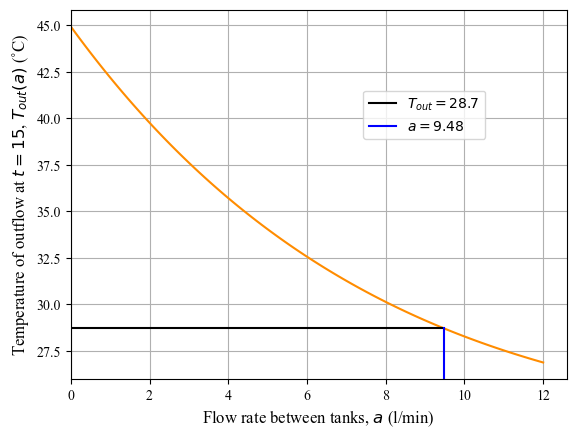

In [39]:
ax = plt.axes()
ax.plot(a_rates, T, color='darkorange')
ax.set_xlabel('Flow rate between tanks, $a$ (l/min)', fontsize=12)
ax.set_ylabel('Temperature of outflow at $t=15$, $T_{out}(a)$ (˚C)', fontsize=12)
ax.axhline(28.7, xmax = 9.48/12.68, color = 'black', label="$T_{out}=28.7$")
ax.axvline(9.48, ymax = 28.7/205, color = 'blue', label='$a=9.48$')
ax.set_xlim(xmin=0)
ax.legend(bbox_to_anchor=(0.85,0.8))
plt.grid()
plt.show()

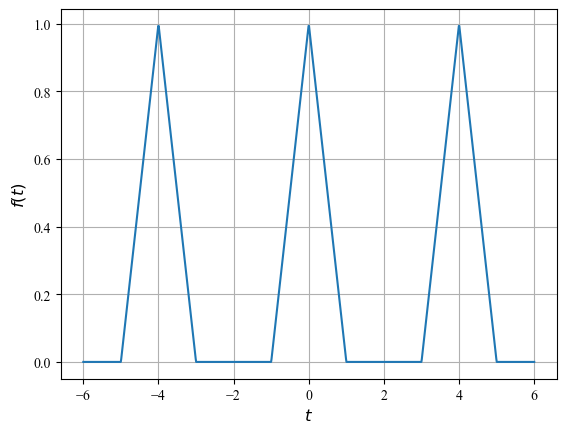

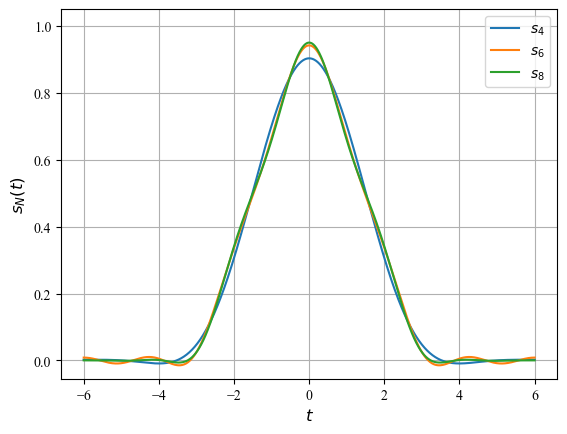

In [40]:
### A2.5

# (a)

def f(x):
    t = x % 4
    return (t-3)*((3<=t)*(t<4)) + (1-t)*((0<=t)*(t<1))

ts = np.linspace(-6, 6, 1000)
plt.plot(ts, f(ts))
plt.xlabel('$t$', fontsize=12)
plt.ylabel('$f(t)$', fontsize=12)
plt.grid()
plt.show()

# (c)

def fFS(t, N):

    # Period
    p = 4

    # Set a0 here
    a0 = 1/2

    # Initialise sN with the constant term
    sN = 0.5*a0*np.ones_like(t)

    # Set up lambda functions for calculation of an and bn
    anFN = lambda k : 4 /(k**2*np.pi**2) * (1-np.cos(k*np.pi/2))
    bnFN = lambda k : 0.

    # Initialise arrays for an and bn
    an = np.empty(N)
    bn = np.empty(N)

    for k in range(1, N+1):

        # Set an and bn
        an[k-1] = anFN(k)
        bn[k-1] = bnFN(k)

        # Add kth terms to the FS
        sN += an[k-1] * np.cos(2.*np.pi*k*t / p) + \
            bn[k-1] * np.sin(2.*np.pi*k*t / p)

    return sN

Ns = [4, 6, 8]
tss = np.linspace(-2, 2, 1000)

for N in Ns:
    plt.xlabel('$t$', fontsize=12)
    plt.ylabel('$s_N(t)$', fontsize=12)
    plt.grid()
    plt.plot(ts, fFS(tss, N), label=f"$s_{N}$")
    plt.ylim(ymax=1.05)
    plt.legend()

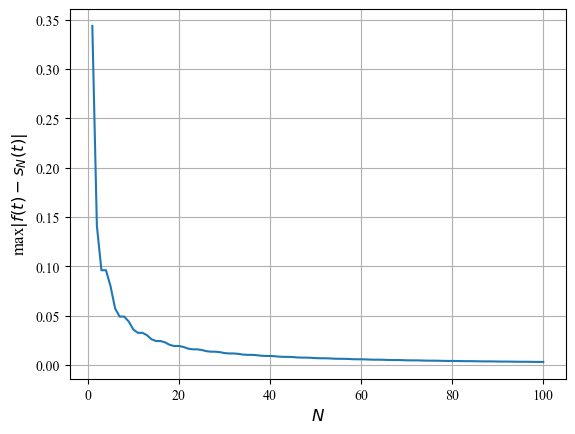

In [5]:
N1s = np.arange(1, 101, 1)
error = []
for N1 in N1s:
    error.append(max(abs(f(ts) - fFS(ts, N1))))

plt.plot(N1s, error)
plt.xlabel('$N$', fontsize=12)
plt.ylabel('max$|f(t)-s_N(t)|$', fontsize=12)      # Absolute max error
plt.grid()